In [1]:
%load_ext autoreload
%autoreload 2
import thor.data.era5 as era5
import thor.data.aura as aura
import thor.data.utils as utils
import thor.utils as gutils
import thor.data.data as data
import thor.grid as grid
import thor.track as track
import thor.option as option
import json
from pathlib import Path

notebook_name = "cpol_demo.ipynb"
__file__ = "/home/ewan/Documents/THOR/examples/cpol_demo.ipynb"


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
cpol_options = aura.create_options(
    name="cpol",
    format="grid_150km_2500m",
    level="1b",
    version="v2020",
    parent_remote="https://dapds00.nci.org.au/thredds/fileServer/hj10",
    parent_local="../thor/test/data/raw"
    # filepaths=filepaths,
)
# aura.check_options(cpol_options)
data_options = data.consolidate_options([cpol_options])
data.save_data_options(data_options, filename="cpol")
grid_options = grid.create_options(name="geographic")
grid.check_options(grid_options)
grid.save_grid_options(grid_options, filename="cpol_geographic")
track_options = option.mcs(save=True)

2024-05-13 15:13:27,096 - thor.data.data - DEBUG - Saving data options to /home/ewan/Documents/THOR/thor/options/data_options/cpol


2024-05-13 15:13:27,101 - thor.grid - DEBUG - Saving grid options to /home/ewan/Documents/THOR/thor/options/grid_options/cpol_geographic
2024-05-13 15:13:27,105 - thor.option - DEBUG - Saving track options to /home/ewan/Documents/THOR/thor/options/track_options/mcs


In [3]:
filepaths = data.generate_filepaths(data_options["cpol"])
len(filepaths)

145

In [4]:
tracks = track.initialise_tracks(track_options, data_options)
print(json.dumps(tracks, indent=4))

TypeError: initialise_tracks() missing 1 required positional argument: 'data_options'

In [5]:
local_filepaths = []
for filepath in filepaths:
    local_filepaths.append(utils.download_file(filepath, parent_remote=data_options["cpol"]["parent_remote"], parent_local=data_options["cpol"]["parent_local"]))
# data_options["cpol"]["filepaths"] = filepaths

2024-05-13 15:13:37,531 - thor.data.utils - DEBUG - ../thor/test/data/raw/cpol/cpol_level_1b/v2020/gridded/grid_150km_2500m/2005/20051113/twp10cpolgrid150.b2.20051113.000000.nc already exists.
2024-05-13 15:13:37,532 - thor.data.utils - DEBUG - ../thor/test/data/raw/cpol/cpol_level_1b/v2020/gridded/grid_150km_2500m/2005/20051113/twp10cpolgrid150.b2.20051113.001000.nc already exists.
2024-05-13 15:13:37,534 - thor.data.utils - DEBUG - ../thor/test/data/raw/cpol/cpol_level_1b/v2020/gridded/grid_150km_2500m/2005/20051113/twp10cpolgrid150.b2.20051113.002000.nc already exists.
2024-05-13 15:13:37,535 - thor.data.utils - DEBUG - ../thor/test/data/raw/cpol/cpol_level_1b/v2020/gridded/grid_150km_2500m/2005/20051113/twp10cpolgrid150.b2.20051113.003000.nc already exists.
2024-05-13 15:13:37,537 - thor.data.utils - DEBUG - ../thor/test/data/raw/cpol/cpol_level_1b/v2020/gridded/grid_150km_2500m/2005/20051113/twp10cpolgrid150.b2.20051113.004000.nc already exists.
2024-05-13 15:13:37,538 - thor.data

2024-05-13 15:13:37,546 - thor.data.utils - DEBUG - ../thor/test/data/raw/cpol/cpol_level_1b/v2020/gridded/grid_150km_2500m/2005/20051113/twp10cpolgrid150.b2.20051113.014000.nc already exists.
2024-05-13 15:13:37,547 - thor.data.utils - DEBUG - ../thor/test/data/raw/cpol/cpol_level_1b/v2020/gridded/grid_150km_2500m/2005/20051113/twp10cpolgrid150.b2.20051113.015000.nc already exists.
2024-05-13 15:13:37,549 - thor.data.utils - DEBUG - ../thor/test/data/raw/cpol/cpol_level_1b/v2020/gridded/grid_150km_2500m/2005/20051113/twp10cpolgrid150.b2.20051113.020000.nc already exists.
2024-05-13 15:13:37,550 - thor.data.utils - DEBUG - ../thor/test/data/raw/cpol/cpol_level_1b/v2020/gridded/grid_150km_2500m/2005/20051113/twp10cpolgrid150.b2.20051113.021000.nc already exists.
2024-05-13 15:13:37,552 - thor.data.utils - DEBUG - ../thor/test/data/raw/cpol/cpol_level_1b/v2020/gridded/grid_150km_2500m/2005/20051113/twp10cpolgrid150.b2.20051113.022000.nc already exists.
2024-05-13 15:13:37,553 - thor.data

In [280]:
tracks = track.simultaneous_track(aura.generate_cpol_times(filepaths), data_options, grid_options, track_options)

2024-05-11 19:53:57,834 - thor.track - INFO - Processing 2005-11-13T00:00:09.000000000.
2024-05-11 19:53:57,835 - thor.track - DEBUG - Processing hierarchy level 0.
2024-05-11 19:53:57,836 - thor.track - DEBUG - Tracking cell.
2024-05-11 19:53:57,837 - thor.track - DEBUG - Tracking middle_cloud.
2024-05-11 19:53:57,838 - thor.track - DEBUG - Tracking anvil.
2024-05-11 19:53:57,840 - thor.track - DEBUG - Processing hierarchy level 1.
2024-05-11 19:53:57,843 - thor.track - DEBUG - Tracking mcs.
2024-05-11 19:53:57,923 - thor.track - INFO - Processing 2005-11-13T00:10:24.000000000.
2024-05-11 19:53:57,924 - thor.track - DEBUG - Processing hierarchy level 0.
2024-05-11 19:53:57,924 - thor.track - DEBUG - Tracking cell.
2024-05-11 19:53:57,925 - thor.track - DEBUG - Tracking middle_cloud.
2024-05-11 19:53:57,926 - thor.track - DEBUG - Tracking anvil.
2024-05-11 19:53:57,927 - thor.track - DEBUG - Processing hierarchy level 1.
2024-05-11 19:53:57,928 - thor.track - DEBUG - Tracking mcs.
2024

In [284]:
time_lookup = aura.cpol_time_lookup(filepaths)

TypeError: Object of type datetime64 is not JSON serializable

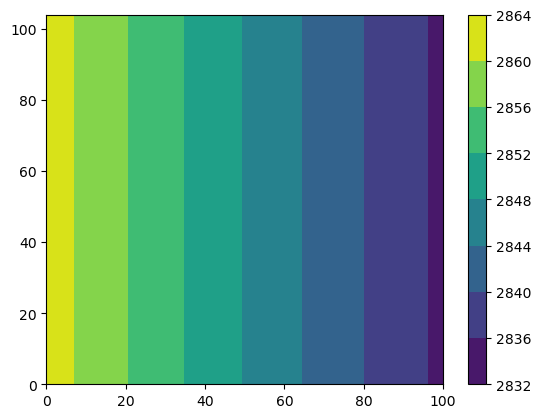

In [37]:
areas = grid.get_area_elements(ds.latitude.values, ds.longitude.values)
import matplotlib.pyplot as plt
plt.contourf(areas)
plt.colorbar()

In [38]:
from pyproj import Geod

In [39]:
longitudes = ds.longitude.values
latitudes = ds.latitude.values
geod = Geod(ellps="WGS84")

In [66]:
almost_equal(longitudes[1:]-longitudes[:-1], 6)

True

In [107]:
longitudes.shape

(105,)

In [64]:
from thor.utils import almost_equal

In [110]:
areas = dx*dy
areas

array([7485303.27409677, 7486068.30656416, 7486831.94372543,
       7487594.1854675 , 7488355.03167795, 7489114.48224528,
       7489872.53705653, 7490629.19600162, 7491384.45896926,
       7492138.32584718, 7492890.79652525, 7493641.8708924 ,
       7494391.54883823, 7495139.8302521 , 7495886.71502504,
       7496632.2030464 , 7497376.29420669, 7498118.98839642,
       7498860.28550634, 7499600.18542788, 7500338.688052  ,
       7501075.79326941, 7501811.50097317, 7502545.8110547 ,
       7503278.72340489, 7504010.23791798, 7504740.35448557,
       7505469.07299973, 7506196.39335417, 7506922.3154419 ,
       7507646.83915637, 7508369.96439128, 7509091.69103982,
       7509812.01899637, 7510530.94815602, 7511248.47841169,
       7511964.60965772, 7512679.34179107, 7513392.67470654,
       7514104.60829772, 7514815.14246081, 7515524.27709201,
       7516232.01208653, 7516938.3473408 , 7517643.28275263,
       7518346.81821673, 7519048.95362995, 7519749.68888985,
       7520449.02389348,

In [141]:
longitudes[[1,2,3,4,5,6,7,8,10]]

array([129.75 , 129.775, 129.8  , 129.825, 129.85 , 129.875, 129.9  ,
       129.925, 129.975])

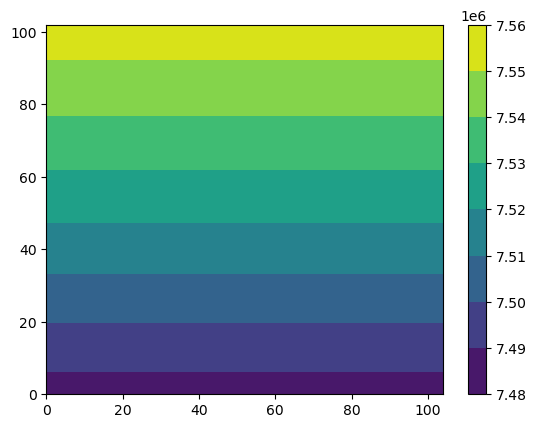

In [159]:
longitudes_alt = longitudes.copy()
longitudes_alt[10] = longitudes_alt[10]
areas, dx, dy = grid.get_area_elements(latitudes, longitudes_alt)
# plt.plot(dx)
# plt.plot(dy)
plt.contourf(areas)
plt.colorbar()

In [129]:
areas.shape

(10405, 10405)

In [117]:
2.7*2.7

7.290000000000001

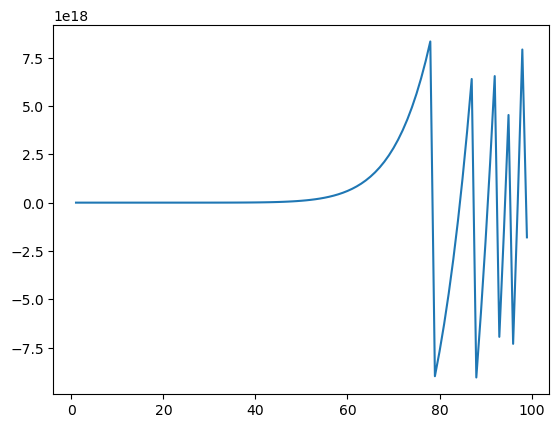

In [93]:
plt.plot(np.arange(1,100), np.arange(1,100)**10)

In [75]:
dx = np.zeros((len(latitudes), len(longitudes)))
dy = np.zeros((len(latitudes), len(longitudes)))

for i in range(1, len(latitudes)-1):
    for j in range(1, len(longitudes)-1):
        dx[i,j] = geod.inv(longitudes[j+1], latitudes[i], longitudes[j-1], latitudes[i])[2]/2
        dy[i,j] = geod.inv(longitudes[j], latitudes[i+1], longitudes[j], latitudes[i-1])[2]/2

In [94]:
geod.inv(longitudes[0], 87, longitudes[0], 86)[2]/2

55844.87151087658

In [95]:
geod.inv(longitudes[0], 2, longitudes[0], 1)[2]/2

55287.53240716807

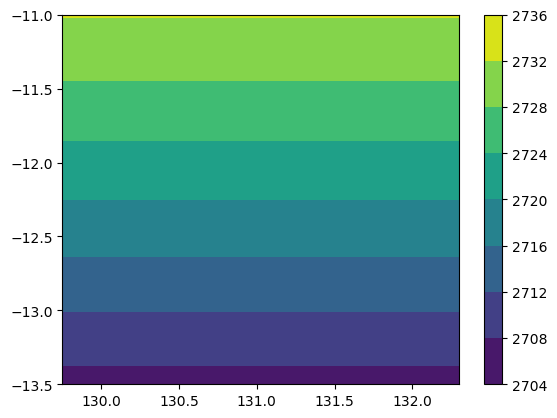

In [87]:
plt.contourf(longitudes[1:-1], latitudes[1:-1], dx[1:-1, 1:-1])
plt.colorbar()

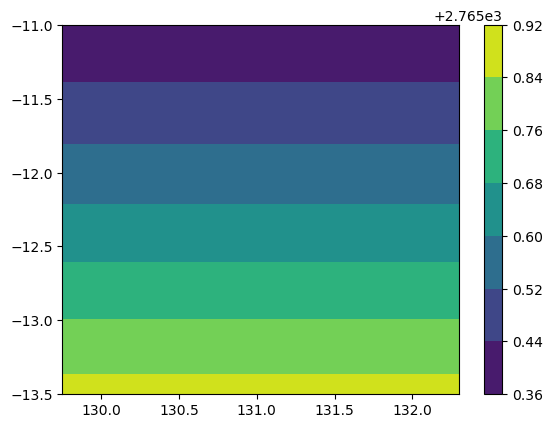

In [88]:
plt.contourf(longitudes[1:-1], latitudes[1:-1], dy[1:-1, 1:-1])
plt.colorbar()

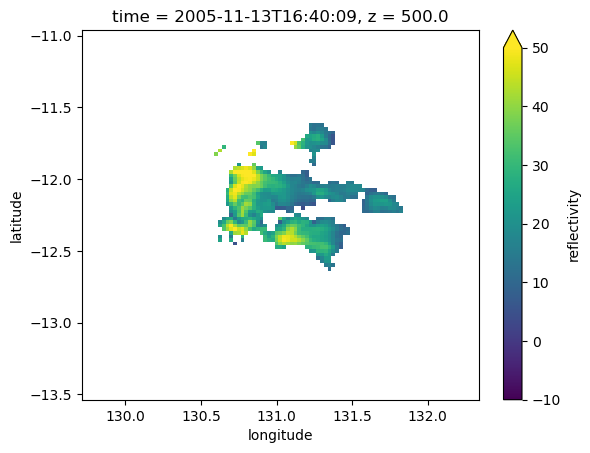

In [227]:
ds['reflectivity'].isel(time=0).isel(z=1).plot(vmin=-10, vmax=50)